<a href="https://colab.research.google.com/github/zakiyyah-ai/Analisa-Klasifikasi-Pinjaman-bagi-Nasabah/blob/main/Klasifikasi_Pinjaman_Nasabah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("ggplot2", lib="/usr/local/lib/R/site-library")

In [4]:
install.packages("RColorBrewer", lib="/usr/local/lib/R/site-library")

In [5]:
install.packages("corrplot", lib="/usr/local/lib/R/site-library")

In [25]:
install.packages("caret", lib="/usr/local/lib/R/site-library")

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [13]:
data = read.csv("/bin/project.csv")
head(data)

,X,NAMA_NASABAH,NOMOR_KONTRAK,DOMISILI,KARAKTER,PROFESI,KONDISI_USAHA,KONDISI_JAMINAN,STATUS,PRODUK,PYD,TENOR,OSL,KEWAJIBAN,KOLEKTIBILITAS,COUNT_SURVEY,REKOMENDASI_TINDAK_LANJUT
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>
1,0,YOLI SEPINA NAINGGOLAN,0,MASIH TETAP,KOOPERATIF,IBU RUMAH TANGGA,2,Baik,2,3,30000000,24,28750000,4896841,DALAM PENGAWASAN KHUSUS,1,Angsuran Biasa
2,1,ERWIN NASUTION,1,MASIH TETAP,TIDAK KOOPERATIF,NELAYAN,3,Rusak,8,3,10000000,12,2040693,0,MACET,1,Penarikan
3,2,HUSIN,2,MASIH TETAP,TIDAK KOOPERATIF,LAINNYA,3,Baik,8,3,60000000,24,0,0,MACET,1,Penarikan
4,3,HARITSYAH,3,PINDAH PERMANEN,KOOPERATIF,PNS,1,Rusak,7,3,90000000,18,0,0,MACET,1,Angsuran Biasa
5,4,HARIRI PANGGABEAN,4,MASIH TETAP,TIDAK KOOPERATIF,WIRAUSAHA / PEDAGANG,1,Baik,8,3,150000000,18,19844807,0,MACET,1,Penarikan
6,5,JHON PREDDY HUTABARAT,5,MASIH TETAP,KOOPERATIF,WIRAUSAHA / PEDAGANG,1,Baik,7,3,40000000,36,27298726,2208516,DALAM PENGAWASAN KHUSUS,1,Restrukturisasi


In [14]:
colnames(data)

[1] "X"                         "NAMA_NASABAH"             
 [3] "NOMOR_KONTRAK"             "DOMISILI"                 
 [5] "KARAKTER"                  "PROFESI"                  
 [7] "KONDISI_USAHA"             "KONDISI_JAMINAN"          
 [9] "STATUS"                    "PRODUK"                   
[11] "PYD"                       "TENOR"                    
[13] "OSL"                       "KEWAJIBAN"                
[15] "KOLEKTIBILITAS"            "COUNT_SURVEY"             
[17] "REKOMENDASI_TINDAK_LANJUT"

In [15]:
summary(data$OSL)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        0   3999950   8687350  26562373  32082900 440932336 

In [16]:
str(data)

'data.frame':	1000 obs. of  17 variables:
 $ X                        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ NAMA_NASABAH             : chr  "YOLI SEPINA NAINGGOLAN" "ERWIN NASUTION" "HUSIN" "HARITSYAH" ...
 $ NOMOR_KONTRAK            : int  0 1 2 3 4 5 6 7 8 9 ...
 $ DOMISILI                 : chr  "MASIH TETAP" "MASIH TETAP" "MASIH TETAP" "PINDAH PERMANEN" ...
 $ KARAKTER                 : chr  "KOOPERATIF" "TIDAK KOOPERATIF" "TIDAK KOOPERATIF" "KOOPERATIF" ...
 $ PROFESI                  : chr  "IBU RUMAH TANGGA" "NELAYAN" "LAINNYA" "PNS" ...
 $ KONDISI_USAHA            : int  2 3 3 1 1 1 3 2 2 3 ...
 $ KONDISI_JAMINAN          : chr  "Baik" "Rusak" "Baik" "Rusak" ...
 $ STATUS                   : int  2 8 8 7 8 7 7 7 7 3 ...
 $ PRODUK                   : int  3 3 3 3 3 3 3 3 3 3 ...
 $ PYD                      : int  30000000 10000000 60000000 90000000 150000000 40000000 60000000 7500000 45000000 50000000 ...
 $ TENOR                    : int  24 12 24 18 18 36 36 4 24 36 ...
 $ OSL    

In [18]:
data_reduce = data[-c(1,2)]
head(data_reduce)

,NOMOR_KONTRAK,DOMISILI,KARAKTER,PROFESI,KONDISI_USAHA,KONDISI_JAMINAN,STATUS,PRODUK,PYD,TENOR,OSL,KEWAJIBAN,KOLEKTIBILITAS,COUNT_SURVEY,REKOMENDASI_TINDAK_LANJUT
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>
1,0,MASIH TETAP,KOOPERATIF,IBU RUMAH TANGGA,2,Baik,2,3,30000000,24,28750000,4896841,DALAM PENGAWASAN KHUSUS,1,Angsuran Biasa
2,1,MASIH TETAP,TIDAK KOOPERATIF,NELAYAN,3,Rusak,8,3,10000000,12,2040693,0,MACET,1,Penarikan
3,2,MASIH TETAP,TIDAK KOOPERATIF,LAINNYA,3,Baik,8,3,60000000,24,0,0,MACET,1,Penarikan
4,3,PINDAH PERMANEN,KOOPERATIF,PNS,1,Rusak,7,3,90000000,18,0,0,MACET,1,Angsuran Biasa
5,4,MASIH TETAP,TIDAK KOOPERATIF,WIRAUSAHA / PEDAGANG,1,Baik,8,3,150000000,18,19844807,0,MACET,1,Penarikan
6,5,MASIH TETAP,KOOPERATIF,WIRAUSAHA / PEDAGANG,1,Baik,7,3,40000000,36,27298726,2208516,DALAM PENGAWASAN KHUSUS,1,Restrukturisasi


In [19]:
data_reduce[, 8:11] = sapply(data_reduce[, 8:11], as.numeric)

In [21]:
data_kategorik = data_reduce[,c("KONDISI_USAHA","KONDISI_JAMINAN","REKOMENDASI_TINDAK_LANJUT")]
chisq.test(data_kategorik$KONDISI_JAMINAN, data_kategorik$KONDISI_USAHA)
par(mfrow=c(2,2))
data_reduce$REKOMENDASI_TINDAK_LANJUT = as.factor(data_reduce$REKOMENDASI_TINDAK_LANJUT)

Warning message in chisq.test(data_kategorik$KONDISI_JAMINAN, data_kategorik$KONDISI_USAHA):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  data_kategorik$KONDISI_JAMINAN and data_kategorik$KONDISI_USAHA
X-squared = 18.181, df = 6, p-value = 0.005796


corrplot 0.84 loaded



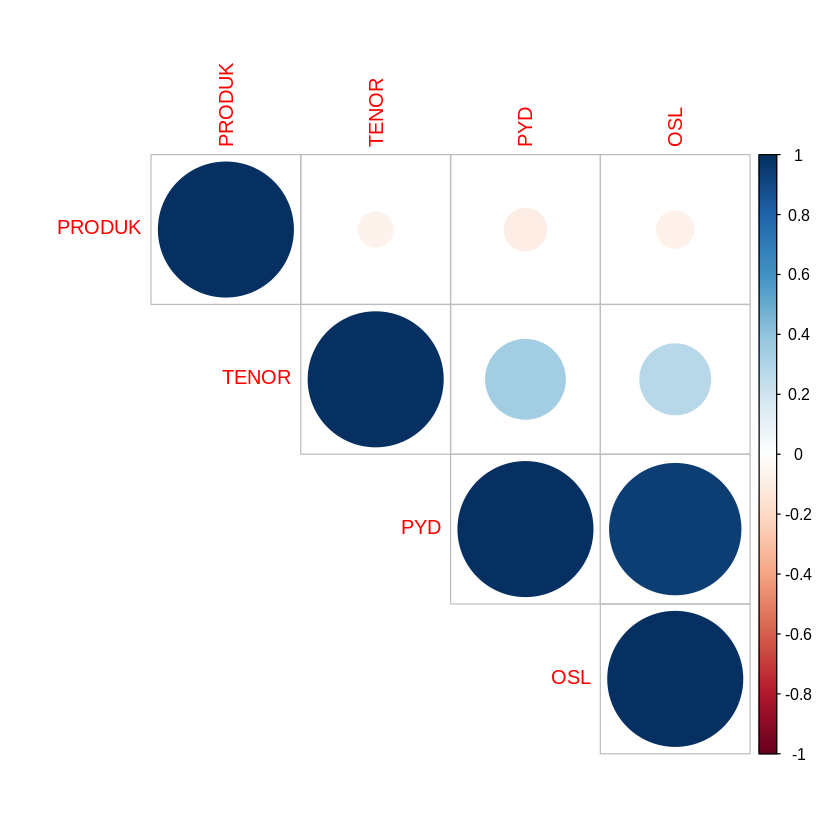

ERROR: ignored

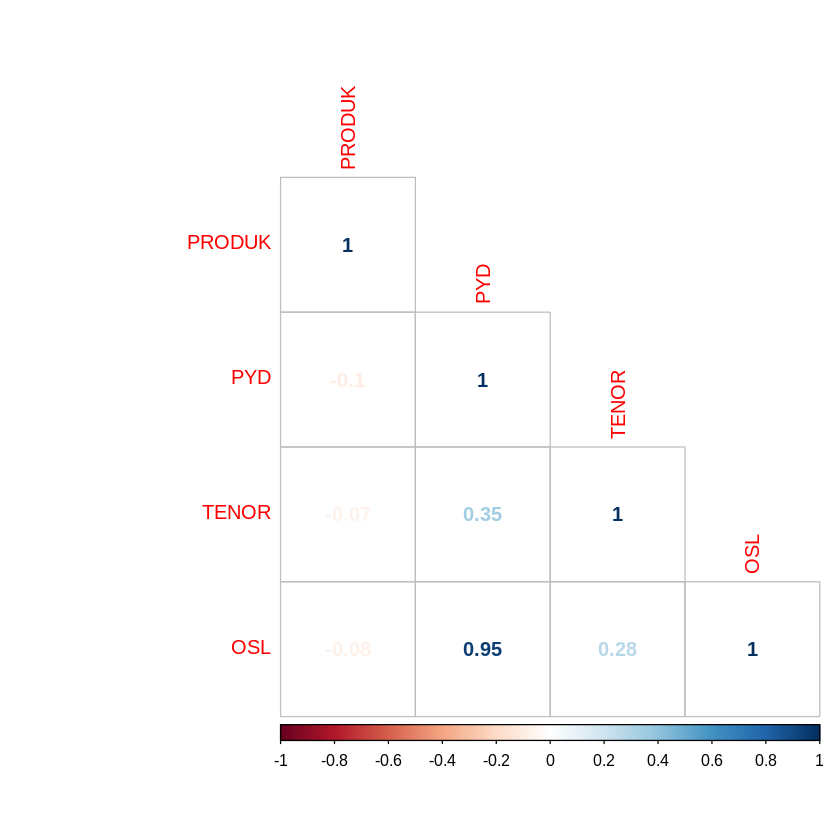

In [22]:
library(corrplot)
M = cor(data_reduce[,8:11])
corrplot(M, type="upper", order="hclust")
corrplot(M,
		 method = 'number',
		 type = "lower")
corr = round(cor(M), 1)
ggcorrplot(corr, hc.order = TRUE,
		   type = "lower",
		   lab = TRUE,
		   lab_size = 3,
		   method="circle",
		   colors = c("tomato2", "white", "springgreen3"),
		   title="Correlogram of Data Nasabah",
		   ggtheme=theme_bw)
cor(M, use="complete.obs", method="kendall")
corrplot(M, method = "ellipse")

In [23]:
colnames(data_reduce)
data_select =
data_reduce[,c("KARAKTER","KONDISI_USAHA","KONDISI_JAMINAN","STATUS","KEWAJIBAN","OSL","KOLEKTIBILITAS","REKOMENDASI_TINDAK_LANJUT")]
#data_select
data_non_na = na.omit(data_select)

[1] "NOMOR_KONTRAK"             "DOMISILI"                 
 [3] "KARAKTER"                  "PROFESI"                  
 [5] "KONDISI_USAHA"             "KONDISI_JAMINAN"          
 [7] "STATUS"                    "PRODUK"                   
 [9] "PYD"                       "TENOR"                    
[11] "OSL"                       "KEWAJIBAN"                
[13] "KOLEKTIBILITAS"            "COUNT_SURVEY"             
[15] "REKOMENDASI_TINDAK_LANJUT"

In [24]:
data_select_new = data_select
data_select_new$KEWAJIBAN = scale(data_select_new$KEWAJIBAN)[,1]
data_select_new$OSL = scale(data_select_new$OSL)[,1]
data_select_new$KEWAJIBAN = cut(data_select_new$KEWAJIBAN, breaks = c(-0.354107,5,15,30))
data_select_new$KEWAJIBAN = as.factor(data_select_new$KEWAJIBAN)
data_select_new$OSL = cut(data_select_new$OSL, breaks = c(-0.60383,3,10,15))
data_select_new$OSL = as.factor(data_select_new$OSL)
data_select_new = na.omit(data_select_new)

In [27]:
library(caret)

index = createDataPartition(data_select_new$REKOMENDASI_TINDAK_LANJUT, p = .95, list = FALSE)
train = data_select_new[index, ]
test = data_select_new[-index, ]

In [28]:
train2 = train
# Setting the reference
train2$REKOMENDASI_TINDAK_LANJUT = relevel(train2$REKOMENDASI_TINDAK_LANJUT, ref = "Angsuran Biasa")
#training the model
require(nnet)
# Training the multinomial model
multinom_model = multinom(REKOMENDASI_TINDAK_LANJUT ~ ., data = train2)


# Checking the model
summary(multinom_model)
#converting the coefficients to odds by taking the exponential of the coefficients.
exp(coef(multinom_model))
head(round(fitted(multinom_model), 2))
# Predicting the values for train dataset
train2$ClassPredicted = predict(multinom_model, newdata = train2, "class")
train_prob = predict(multinom_model, newdata = train2, "probs")
df = train_prob
df$max=apply(df,1, max)
train2$score = df$max
test_prob = predict(multinom_model, newdata = test, "probs")
df2 = test_prob
df2$max=apply(df2,1, max)
# Building classification table
tab_train = table(train2$REKOMENDASI_TINDAK_LANJUT, train2$ClassPredicted)
round((sum(diag(tab_train))/sum(tab_train))*100,4)
test$ClassPredicted = predict(multinom_model, newdata = test, "class")
test$score = df2$max
tab_test = table(test$REKOMENDASI_TINDAK_LANJUT, test$ClassPredicted)
round((sum(diag(tab_test))/sum(tab_test))*100,4)

Loading required package: nnet



# weights:  64 (45 variable)
initial  value 1319.752232 
iter  10 value 741.595766
iter  20 value 616.626481
iter  30 value 612.686210
iter  40 value 612.413398
iter  50 value 612.405736
iter  60 value 612.405524
final  value 612.405504 
converged


Warning message in sqrt(diag(vc)):
“NaNs produced”


Call:
multinom(formula = REKOMENDASI_TINDAK_LANJUT ~ ., data = train2)

Coefficients:
                 (Intercept) KARAKTERTIDAK KOOPERATIF KONDISI_USAHA
Diskon Pelunasan   -3.309008                 1.935373    -0.7697833
Penarikan          -7.174932                 3.734688     0.5501786
Restrukturisasi    -4.181420                -2.220981     0.9911328
                 KONDISI_JAMINANHilang KONDISI_JAMINANPindah Tangan
Diskon Pelunasan           -26.3303085                  -30.4963884
Penarikan                    0.9128478                    0.5663325
Restrukturisasi              0.5173253                  -13.8855248
                 KONDISI_JAMINANRusak    STATUS KEWAJIBAN(5,15]
Diskon Pelunasan          -26.7116318 0.1067252               0
Penarikan                  -1.0052622 0.1335513               0
Restrukturisasi             0.1175383 0.3280570               0
                 KEWAJIBAN(15,30]   OSL(3,10] OSL(10,15]
Diskon Pelunasan        -3.987493   2.9816111          0


,(Intercept),KARAKTERTIDAK KOOPERATIF,KONDISI_USAHA,KONDISI_JAMINANHilang,KONDISI_JAMINANPindah Tangan,KONDISI_JAMINANRusak,STATUS,"KEWAJIBAN(5,15]","KEWAJIBAN(15,30]","OSL(3,10]","OSL(10,15]",KOLEKTIBILITASDIRAGUKAN,KOLEKTIBILITASKURANG LANCAR,KOLEKTIBILITASLANCAR,KOLEKTIBILITASMACET
Diskon Pelunasan,0.0365524057,6.9266284,0.4631134,3.671912e-12,5.696220e-14,2.507759e-12,1.112628,1,1.854616e-02,1.971956e+01,1,18.4646217,1.4442696,1.179101e+00,1.7573103
Penarikan,0.0007655377,41.8749494,1.7335626,2.491408e+00,1.761794e+00,3.659487e-01,1.142880,1,3.250768e+00,1.662017e-12,1,91.9844968,3.2827430,3.442160e-14,6.0033622
Restrukturisasi,0.0152767967,0.1085026,2.6942849,1.677535e+00,9.323805e-07,1.124725e+00,1.388268,1,2.862786e+12,1.547821e+00,1,0.8894688,0.8327388,2.326784e+00,0.0378579


,Angsuran Biasa,Diskon Pelunasan,Penarikan,Restrukturisasi
1,0.82,0.01,0.00,0.17
2,0.48,0.00,0.51,0.01
3,0.25,0.03,0.72,0.00
4,0.98,0.00,0.01,0.02
5,0.41,0.20,0.40,0.00
6,0.69,0.02,0.00,0.28


Warning message in df$max = apply(df, 1, max):
“Coercing LHS to a list”
Warning message in df2$max = apply(df2, 1, max):
“Coercing LHS to a list”


[1] 68.6975

[1] 66.6667